In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
df.shape

(614, 13)

In [34]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [35]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [41]:
def preprocessing(df):
    df.drop(['Loan_ID'],axis=1,inplace=True)
    numerical = df.select_dtypes(exclude="object")
    categorical = df.select_dtypes(include="object")

    for i in numerical.columns:
        df[i].fillna(df[i].median(),inplace=True)
    for i in categorical.columns:
        df[i].fillna(df[i].mode()[0],inplace=True)
    df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    return df

In [42]:
df = preprocessing(df)

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [44]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
total_income         0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

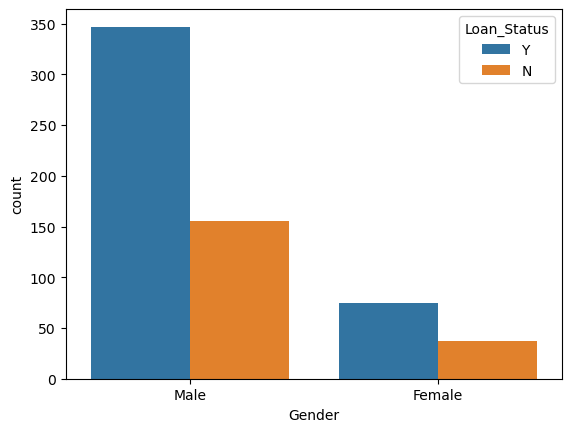

In [45]:
sns.countplot(data=df,x="Gender",hue="Loan_Status")

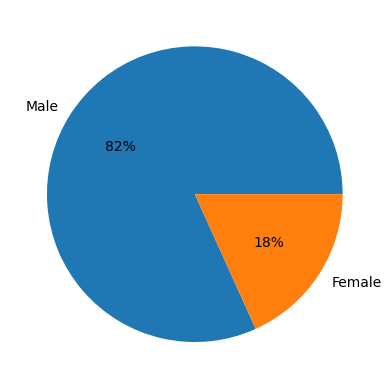

In [46]:
plt.pie([502,112], labels=["Male","Female"], 
        autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

<Axes: >

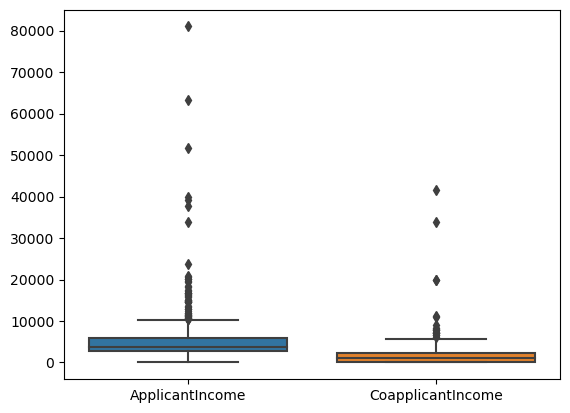

In [47]:
sns.boxplot(df[['ApplicantIncome','CoapplicantIncome']])

<Axes: >

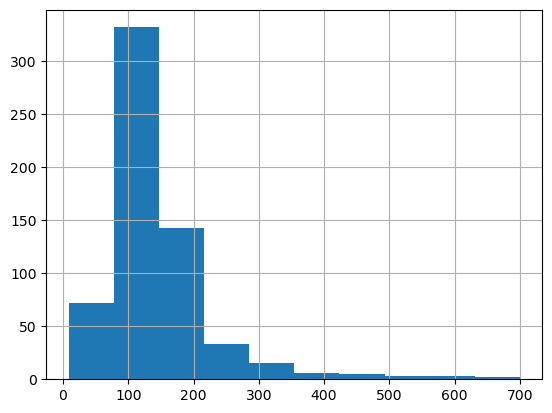

In [48]:
df['LoanAmount'].hist()

<Axes: >

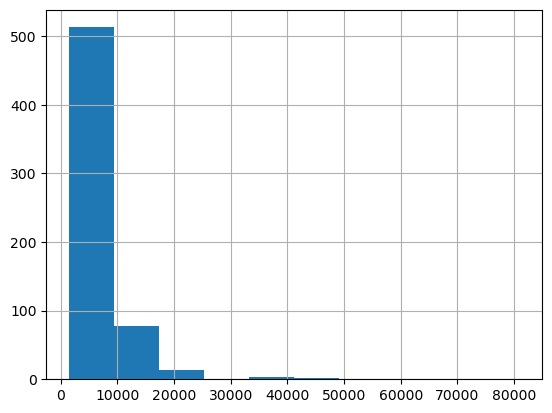

In [50]:
df['total_income'].hist()

In [54]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

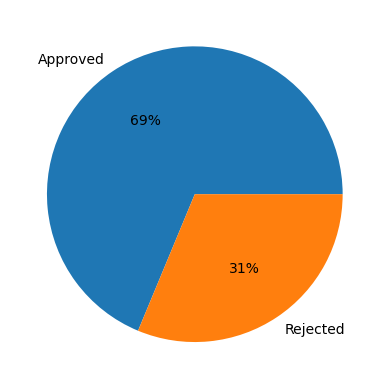

In [58]:
plt.pie([422,192],labels=["Approved","Rejected"],autopct='%.0f%%')
plt.show()

c:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


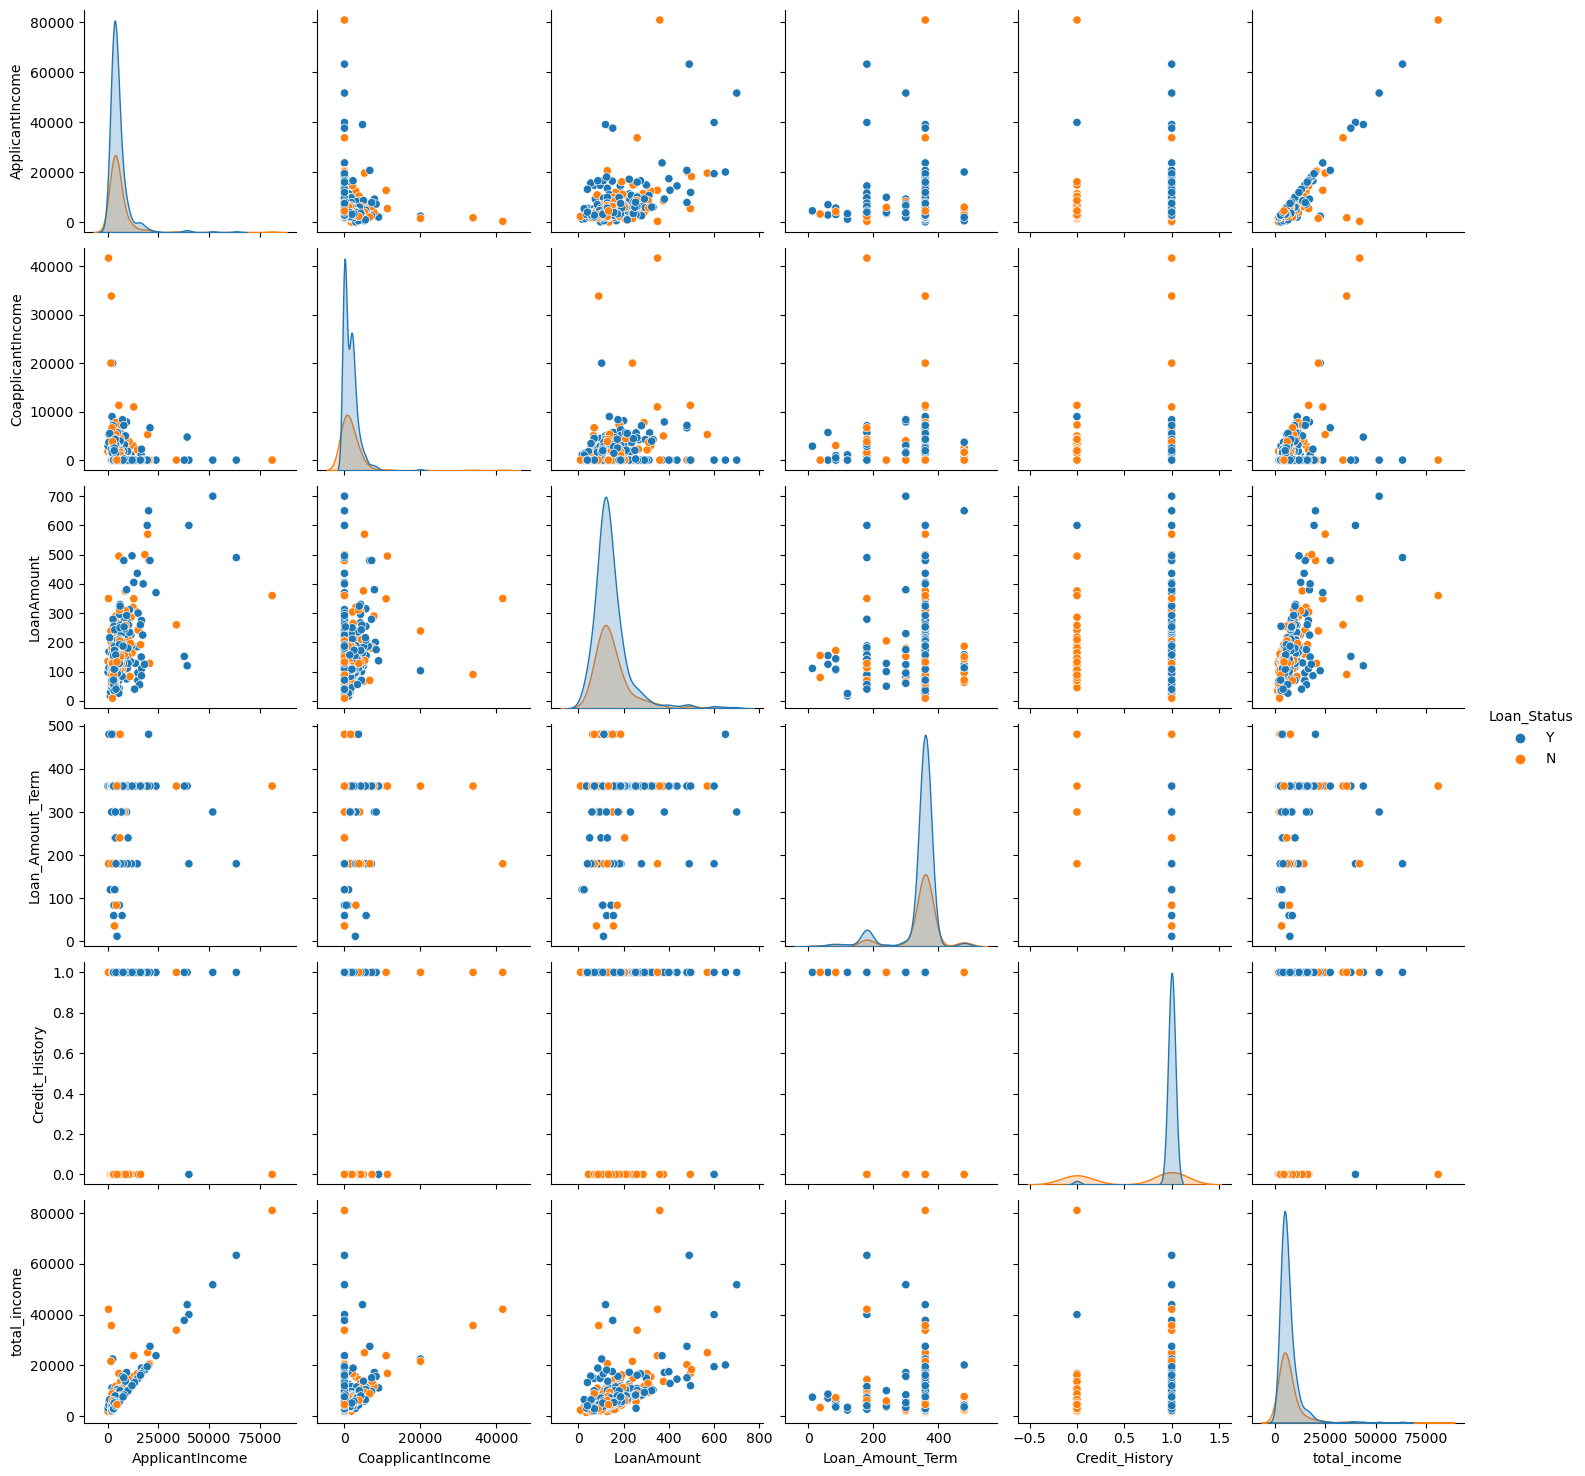

In [60]:
sns.pairplot(df,hue='Loan_Status')

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [63]:
def processing(df,encoder):
    categorical = df.select_dtypes(include="object")
    for i in categorical.columns:
        df[i] = encoder.fit_transform(df[[i]])
    return df

In [64]:
df = processing(df,encoder)

c:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [65]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [66]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
parameters = {
    "n_estimators" : [1,10,100,1000],
    "criterion" : ["gini","entropy","log_loss"],
    "max_depth" : [1,2,3,4,5]
}

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(),param_grid=parameters,cv=2,verbose=3)
clf.fit(X_train,y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits
[CV 1/2] END criterion=gini, max_depth=1, n_estimators=1;, score=0.712 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, n_estimators=1;, score=0.804 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, n_estimators=10;, score=0.702 total time=   0.0s


[CV 2/2] END criterion=gini, max_depth=1, n_estimators=10;, score=0.706 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, n_estimators=100;, score=0.707 total time=   0.3s
[CV 2/2] END criterion=gini, max_depth=1, n_estimators=100;, score=0.710 total time=   0.2s
[CV 1/2] END criterion=gini, max_depth=1, n_estimators=1000;, score=0.716 total time=   2.6s
[CV 2/2] END criterion=gini, max_depth=1, n_estimators=1000;, score=0.710 total time=   1.9s
[CV 1/2] END criterion=gini, max_depth=2, n_estimators=1;, score=0.730 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=2, n_estimators=1;, score=0.696 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=2, n_estimators=10;, score=0.823 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=2, n_estimators=10;, score=0.804 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=2, n_estimators=100;, score=0.837 total time=   0.1s
[CV 2/2] END criterion=gini, max_depth=2, n_estimators=100;, score=0.771 total time= 

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [1, 10, 100, 1000]},
             verbose=3)

In [73]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}

In [74]:
model = RandomForestClassifier(
    criterion = "gini",
    max_depth = 3,
    n_estimators = 100
)

In [75]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [76]:
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7837837837837838

In [104]:
test = pd.read_csv("loan-test.csv")

In [105]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [107]:
test2 = test.copy()
test2 = preprocessing(test2)

In [108]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [109]:
test2 = processing(test2,encoder)

c:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [110]:
test2 = scaler.transform(test2)

In [111]:
predictions = model.predict(test2)

In [112]:
predictions = pd.DataFrame(predictions,columns=["predictions"])

In [113]:
test = pd.concat((test,predictions),axis=1)

In [114]:
test['predictions'] = test['predictions'].map({
    1:"Yes",
    0:"No"
})

In [115]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predictions
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Yes
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes


In [100]:
test.to_csv("submission.csv",index=False)